# Statistical Methods (SS18) {-}
## David Bubeck, Henrik Lukas Ruh & Manuel Bayer {-}
## Exercise 4 for August 10, 2018, 9:00 {-}

### 4.1 Covariance of variables in a time series of measurements
The file weathergraz.txt (on Moodle) contains measurements of the duration of sunshine over a month
in the morning and afternoon (in hours) taken at the weather station of the University of Graz in 1961. 

For this data set:
#### a: Read the data in and create a plot of afternoon vs. morning sunshine hours

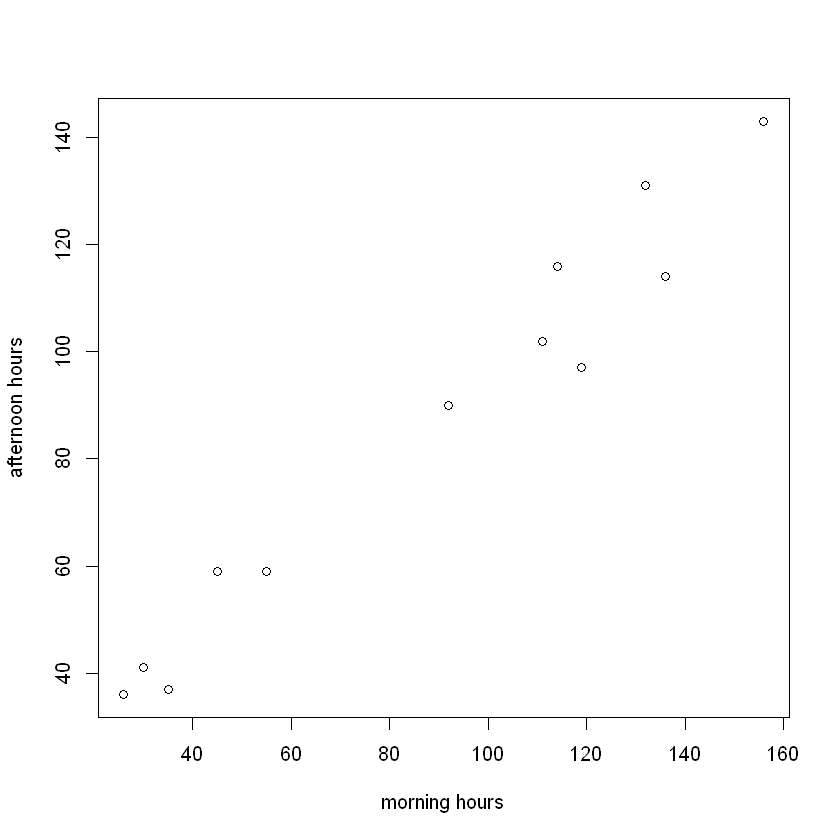

In [1]:
# import data
data <- read.table("weathergraz.txt", header = TRUE, sep = "")

plot(data$morning, data$afternoon, xlab = "morning hours", 
     ylab = "afternoon hours")

#### b: Calculate the covariance matrix between morning to afternoon sunshine hours

In [2]:
n_row = dim(data)[1] # dimension rows
# dimension for columns  for looping over the columns but ignoring
# the first column with months
n_col = 2 # for morning and afternoon column

#calculating mean vector for morning hours and afternoon hours
mean <- matrix(0, nrow = 2, ncol = 1)
for(col in 1:n_col) {
    for(row in 1:n_row) {
        # the plus 1 in the data column is for accessing the data columns
        # in the text file -> accsess morning and afternoon data and skip
        # month column for the mean vector calculation
        mean[col] = mean[col] + data[row, col + 1]
    }
    mean[col] = mean[col] / n_row
}
# mean vector has enries first column morning mean
# second column afternoon mean
print("mean vector (first entry morning mean, second entry afternoon mean)")
print(mean)

# calculating covariance matrix
# calculating difference matrix and variance / deviation
# to calculate the covariance matrix, 
# we first calculate a difference matrix,
# which entries are of form (data x_i - mean)
diffMat <- matrix(0, nrow = n_row, ncol = n_col)
var <- matrix(0, nrow = n_col, ncol = 1)
dev <- matrix(0, nrow = n_col, ncol = 1)
for(col in 1:n_col) {
    for(row in 1:n_row) {
        diffMat[row, col] = data[row, col + 1] - mean[col]
        #calculating variance for corrolation matrix
        var[col] = var[col] + (data[row, col + 1] - mean[col])^2
    }
    #calculating deviation
    dev[col] = sqrt(1/(n_row - 1) * var[col])
}

# calculating covariance matrix by matrix element
# by element product of the
# difference matrix with the transposed difference matrix
covMat <- (n_row - 1)^(-1) * t(diffMat) %*% diffMat
print("coded covariance matrix")
print(covMat)

# calculate the covariance matrix with R build in function cov()
# we need to calculate every entry by hand 
# because R do not build a matrix
covVec <- c(cov(data$morning, data$morning),
            cov(data$morning, data$afternoon),
            cov(data$afternoon, data$morning),
            cov(data$afternoon, data$afternoon))
cov_buildIn <- matrix(covVec, nrow = 2, ncol = 2)
print("build in function")
print(cov_buildIn)


[1] "mean vector (first entry morning mean, second entry afternoon mean)"
         [,1]
[1,] 87.58333
[2,] 85.41667
[1] "coded covariance matrix"
         [,1]     [,2]
[1,] 2181.720 1732.826
[2,] 1732.826 1430.083
[1] "build in function"
         [,1]     [,2]
[1,] 2181.720 1732.826
[2,] 1732.826 1430.083


#### c: Calculate the correlation coefficient

In [3]:
# calculating correlation matrix
# the deviation dev is calculated parallel with the difference matrix
corMat <- matrix(0, nrow = dim(covMat)[1], ncol = dim(covMat)[2])
for(i in 1:dim(covMat)[1]) {
    for(j in 1:dim(covMat)[2]) {
        corMat[i, j] = covMat[i, j] / (dev[i]*dev[j])
    }
}
print("coded correlation matrix")
print(corMat)

# calculate correlation matrix with R build in function using cov2cor,
# which builds a matrix instead of a single value
print("build in function")
print(cov2cor(covMat))


[1] "coded correlation matrix"
         [,1]     [,2]
[1,] 1.000000 0.981013
[2,] 0.981013 1.000000
[1] "build in function"
         [,1]     [,2]
[1,] 1.000000 0.981013
[2,] 0.981013 1.000000


#### d: Do you think that the way you estimated the covariance matrix gives in fact an unbiased estimate of the underlying true covariance of the "sunshine population"? There is no calculation necessary here, just give it a thought.

The estimator is unbiased, if the estimate approaches the true value for the sample size to infinity. We showed in the lecture variance estimator is unbiased with a factor of $\frac{1}{n-1}$, which we used here for the computation of coded covariance matrix. Thus, we think that it is unbiased.

### 4.2 Performance of Monte Carlo integration in different dimensions
We would like to compare the performance of the Monte Carlo integration technique with the regular
midpoint method. To this end, consider the integral
$$
I = \int_{V}^{} f\left(\mathrm{x}\right) \mathrm{d}^{d}\mathrm{x},
$$
where the integration domain V is a d-dimensional hypercube with $0 \leq x_i \leq 1$ for each component of
the vector $\mathrm{x} = \left(x_1, x_2, ... , x_d\right)$. The function we want to integrate is given by
$$
f(\mathrm{x}) = \prod_{i=1}^{d}  \frac{3}{2} \left( 1-x_i^2 \right)
$$
This has an analytic solution of course, which is $\langle f \rangle = I = 1$ independent of d and $\langle f^2 \rangle = \left( 6/5 \right) ^{d}$,

but we want to ignore this for the moment and use the problem as a test of the relative performance
of Monte Carlo integration and ordinary integration techniques. To this end, calculate the integral in
dimensions $d = 1,2,3,..., 10$, using

#### a: the midpoint method, where you divide the volume into a set of much smaller hypercubes obtained by subdividing each axis into n intervals, and where you approximate the integral by evaluating the function at the centers of the small cubes.
Hint: On Moodle you find the auxiliary function xmidpoints.R which may help you to solve the problem. Be aware that one can very easily fill up the whole computer memory with it. So, handle the number of dimensions with care! Alternative, think about a way of splitting the integration into smaller pieces.

#### b: standard Monte Carlo integration in d dimensions, using N random vectors. For definiteness, adopt $n = 6$ and $N = 20000$. For both of the methods, report the numerical result for I, estimated uncertainty, and the CPU-time needed for each of the dimensions $d = 1,2,..., 10$. (If you manage, you can also go to higher dimension. If you run into memeory problems stop at dimension smaller than 10.)

To compute the uncertainty of the numerical and analytical result with respect to the Monte-Carlo integration, $$\sigma_{I_N}=V\sqrt{\frac{\left<f^2\right>-\left<f\right>^2}{N}}$$ was used. In the case of the numerical result these moments were estimated from the Monte-Carlo samples by $$\left<f\right>\simeq\frac{1}{N}\sum_i f(x_i)$$$$\left<f^2\right>\simeq\frac{1}{N}\sum_i f^2(x_i)$$.

The uncertainty of the midpoint method is approximated with the standard deviation of the function values at the midpoints. For the analytical error, the same function as above is used, but with $N=1$.

In [4]:
# helper function midpoints
xmidpoints <- function(n,dim) {
  # n:   number of points per dimension (>= 1)
  # dim: number of dimension            (>= 1)
  # returns a (2D) of matrix(n^dim, dim) x
  # located at midpoints of a unit hypercube

  n1 <- n^dim
  ii <- matrix(nrow=n1,ncol=dim)
  d  <- 0:(n1-1)
  for (j in 0:dim-1) ii[,j+1]<-(d%/%(n^j)) %% n 
  ii <- ii/as.double(n) + 1.0/as.double(2.0*n) # shift to midpoint
  return(ii)
}


# function f
f <- function(x){
    prod(1.5*(1-x**2))
}

# function f for row
frow <- function(x) apply(3/2*(1 - x ** 2),2, prod)
    
# function for integral
I <- function(m){
    fm <- apply(m,1,f)
    c(mean(fm),sd(fm))
}
    
# analytic integral
analytic_I <- function(dim){
    c(1,(((6/5)**dim)-1)**0.5) # mean and standard deviation
}
    
# monte carlo integral
I_N <- function(x, N) 1 / N * sum(frow(x))


# monte carlo error
sigma_I_N <- function(x, N) sqrt((1 / N * sum(frow(x)**2) 
                                  - I_N(x, N)**2) / N)

In [7]:
# parameters
n <- 6 # number of points per dimension
#dim <- 3 # number of dimensions

# dimensions
Dims <- 1:9
N <- 2e4 # number of Monte Carlo runs

# vector of running times
T_mp <- Dims # midpoint
T_mc <- Dims # monte carlo

# loop over dimension to test the midpoint method 
# for different dimensions
for(dim in Dims){
    cat('======================================================\n')
    cat('dimensions: ',dim,'\n')
    cat('-----------------------\n')

    # system time 0
    op <- options(digits.secs = 6)
    t0 <- Sys.time()
    
    # generate midpoint matrix
    m <- xmidpoints(n,dim)

    # compute integral with midpoint method
    int <- I(m)

    # system time 1
    op <- options(digits.secs = 6)
    t1 <- Sys.time()
    
    # time difference
    t <- t1-t0
    T_mp[dim] <- t 
    
    # print running time
    cat('running time midpoint method\n')
    cat(t,'+/-',2**0.5*1e-3,'s\n')   
    
    # print midpoint
    cat('midpoint method\n')
    cat(int[1],'+/-',int[2],'\n')


    # -----------------------------------------------------------------
  
    # analytical solution
    int <- analytic_I(dim)

    # print analytical solution
    cat('analytic solution for midpoint method\n')
    cat(int[1],'+/-',int[2],'\n')
    
        
    # -----------------------------------------------------------------
    cat('-----------------------\n')

    # system time 0
    op <- options(digits.secs = 6)
    t0 <- Sys.time()
    
    # generate random coordinates of points to evaluate
    x <- matrix(runif(N * dim), nrow=dim, ncol=N)
    
    # compute integral
    int <- c(I_N(x, N),sigma_I_N(x, N))

    # system time 1
    op <- options(digits.secs = 6)
    t1 <- Sys.time()
    
    # time difference
    t <- t1-t0
    T_mc[dim] <- t 
    
    # print running time
    cat('running time Monte Carlo method\n')
    cat(t,'+/-',2**0.5*1e-3,'s\n')   
    
    # print midpoint
    cat('Monte Carlo method\n')
    cat(int[1],'+/-',int[2],'\n')

    # -----------------------------------------------------------------

    # analytical solution
    int <- analytic_I(dim)

    # print analytical solution
    cat('analytic solution for Monte Carlo method\n')
    cat(int[1],'+/-',int[2]/N**0.5,'\n')
    

}

dimensions:  1 
-----------------------
running time midpoint method
0 +/- 0.001414214 s
midpoint method
1.003472 +/- 0.4813657 
analytic solution for midpoint method
1 +/- 0.4472136 
-----------------------
running time Monte Carlo method
0.09374309 +/- 0.001414214 s
Monte Carlo method
1.001258 +/- 0.00316099 
analytic solution for Monte Carlo method
1 +/- 0.003162278 
dimensions:  2 
-----------------------
running time midpoint method
0 +/- 0.001414214 s
midpoint method
1.006957 +/- 0.6620696 
analytic solution for midpoint method
1 +/- 0.663325 
-----------------------
running time Monte Carlo method
0.07812786 +/- 0.001414214 s
Monte Carlo method
0.9973392 +/- 0.004698319 
analytic solution for Monte Carlo method
1 +/- 0.004690416 
dimensions:  3 
-----------------------
running time midpoint method
0.01562405 +/- 0.001414214 s
midpoint method
1.010453 +/- 0.8429075 
analytic solution for midpoint method
1 +/- 0.8532292 
-----------------------
running time Monte Carlo method
0.07

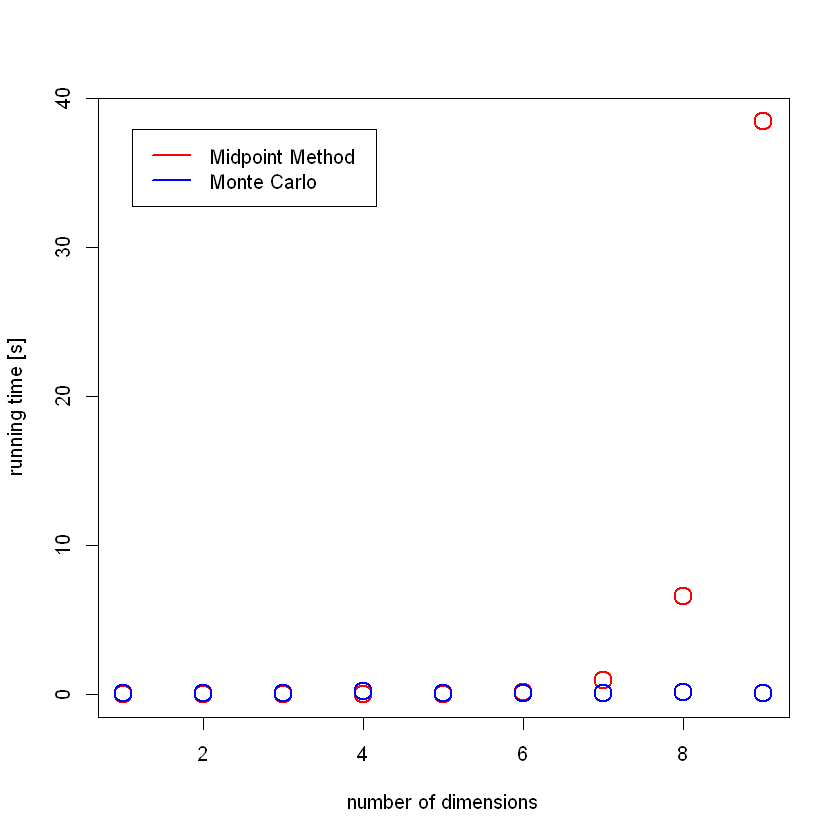

In [8]:
# plot computation time 
plot(Dims,T_mp,xlab='number of dimensions',ylab='running time [s]',
     lwd = 2,cex = 2,type='p',col='red')

points(Dims,T_mc,xlab='number of dimensions',ylab='time [s]',
       lwd = 2,cex = 2,type='p',col='blue')

legendValue = c("Midpoint Method","Monte Carlo")
legend("topleft", legend=legendValue, inset=.05, 
       lwd=2, col=c('red','blue'))


We observe that computation time for the midpoint integration method strongly increases with the number of dimensions as expected. The method is very fast for a number of dimensions below five. We estimate the error of the system time with 1ms (see documentation).
